<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Week3_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis Class assignment Credit information analysis

## [Problem 1] Understanding the content of the competition

*   Home Credit is a non-bank financial company, they provide installment financial loans to unbanked people who have no or little credit history.
*   The competition seeks for Kagglers' support to learn deeper the costumer's data they have and from such predicts their clients' repayment abilities.
*   The ability to predict this knowledge helps the company manage risk, understand more about their clients and ensure the services.



## Preparing the dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('sample_data/application_train.csv')

## [Problem 2] Understanding the overview of data

### Overview

In [39]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [41]:
print("Size of dataframe:", data.shape)

Size of dataframe: (307511, 122)


In [42]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [43]:
print("All column attributes:")
print(data.columns.values)

All column attributes:
['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG'

### Check missing data

In [44]:
def missing_overview(data):
    total_missing_values = data.isnull().sum(axis=0).sort_values(ascending=False)
    missing_ratio = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)

    return pd.concat([total_missing_values, missing_ratio], axis=1, keys=['total', 'missing_ratio'])

print(missing_overview(data).head(20))

                           total  missing_ratio
COMMONAREA_MEDI           214865      69.872297
COMMONAREA_AVG            214865      69.872297
COMMONAREA_MODE           214865      69.872297
NONLIVINGAPARTMENTS_MODE  213514      69.432963
NONLIVINGAPARTMENTS_MEDI  213514      69.432963
NONLIVINGAPARTMENTS_AVG   213514      69.432963
FONDKAPREMONT_MODE        210295      68.386172
LIVINGAPARTMENTS_MEDI     210199      68.354953
LIVINGAPARTMENTS_MODE     210199      68.354953
LIVINGAPARTMENTS_AVG      210199      68.354953
FLOORSMIN_MEDI            208642      67.848630
FLOORSMIN_MODE            208642      67.848630
FLOORSMIN_AVG             208642      67.848630
YEARS_BUILD_MEDI          204488      66.497784
YEARS_BUILD_AVG           204488      66.497784
YEARS_BUILD_MODE          204488      66.497784
OWN_CAR_AGE               202929      65.990810
LANDAREA_MODE             182590      59.376738
LANDAREA_AVG              182590      59.376738
LANDAREA_MEDI             182590      59

Maximum percent of missing samples is about 70% in total

Percentage of target classes

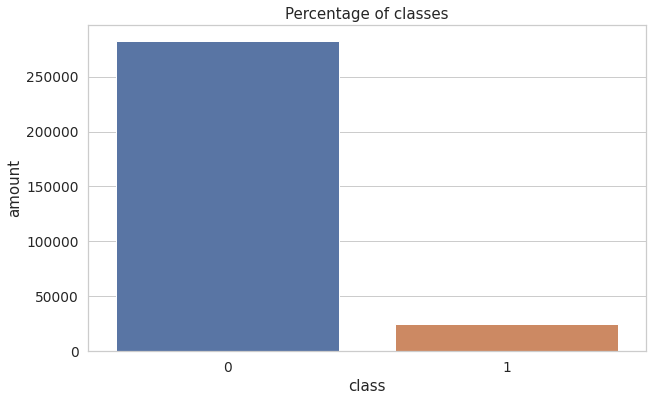

It's seem that dataset is imbalanced, the number of class 0 dominates that of class 1.


In [45]:
temp = data['TARGET'].value_counts()
target_classes = pd.DataFrame({'class': temp.index,
                               'amount': temp.values})

plt.figure(figsize=(10, 6))
plt.title("Percentage of classes")
plt.xlabel("class")
plt.ylabel("percent")
sns.barplot(x='class', y='amount', data=target_classes)
plt.show()

print("It's seem that dataset is imbalanced, the number of class 0 dominates that of class 1.")

## [Problem 3] Defining issues

In [46]:
missing_df = missing_overview(data)
num_of_severve_missing_cols = missing_df[missing_df['missing_ratio'] > 15].shape[0]
print("Number of column attributes have over 15% missing values:", num_of_severve_missing_cols)
print(f"It's about {num_of_severve_missing_cols / data.shape[1] * 100}% of columns")

Number of column attributes have over 15% missing values: 51
It's about 41.80327868852459% of columns


Nearly half the number of attributes contain missing values severely (assume 15% is severe).
The target to be predicted is highly imbalanced, which can lead to inefficient prediction model

Some issues/questions:

1.   TARGETs are imbalanced maybe because the data is collected among the same group of people or attributes.
2.   Some features have fairly similar names or aspects of information. May be there is correlation among them
3.   Does data follow some probability distribution?
4.   Does imbalance TARGET spoil features' distribution?



## [Problem 4] Data exploration

In [47]:
def column_with_target_stats(data, column, label_rotate=False, target=1):
    """
    Use samples with TARGET=1 to show distribution of 'column' feature
    """
    df = data[data['TARGET'] == target]
    
    fig, ax = plt.subplots(1, 3, figsize=(24, 6))
    fig.suptitle(f"Insight of {column} with TARGET={target}")

    temp = data[column].value_counts()
    temp = pd.DataFrame({column: temp.index, 'count': temp.values})
    temp = temp.sort_values(['count'], ascending=False).reset_index(drop=True)
    s = sns.barplot(x=column, y='count', data=temp, ax=ax[0])
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax[0].set_title("Number of samples in total")

    temp = df[column].value_counts()
    temp = pd.DataFrame({column: temp.index, 'count': temp.values})
    temp = temp.sort_values(['count'], ascending=False).reset_index(drop=True)
    s = sns.barplot(x=column, y='count', data=temp, ax=ax[1])
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax[1].set_title("Number of samples with TARGET=1")

    values = data[column].value_counts()
    temp = {value: df[df[column] == value].shape[0] / count for value, count in values.items()}
    temp = pd.DataFrame({column: temp.keys(), 'percent': temp.values()})
    temp = temp.sort_values(['percent'], ascending=False).reset_index(drop=True)
    s = sns.barplot(x=column, y='percent', data=temp, ax=ax[2])
    if label_rotate:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ax[2].set_title("Percent of target with value 1 [%]")

    plt.show()

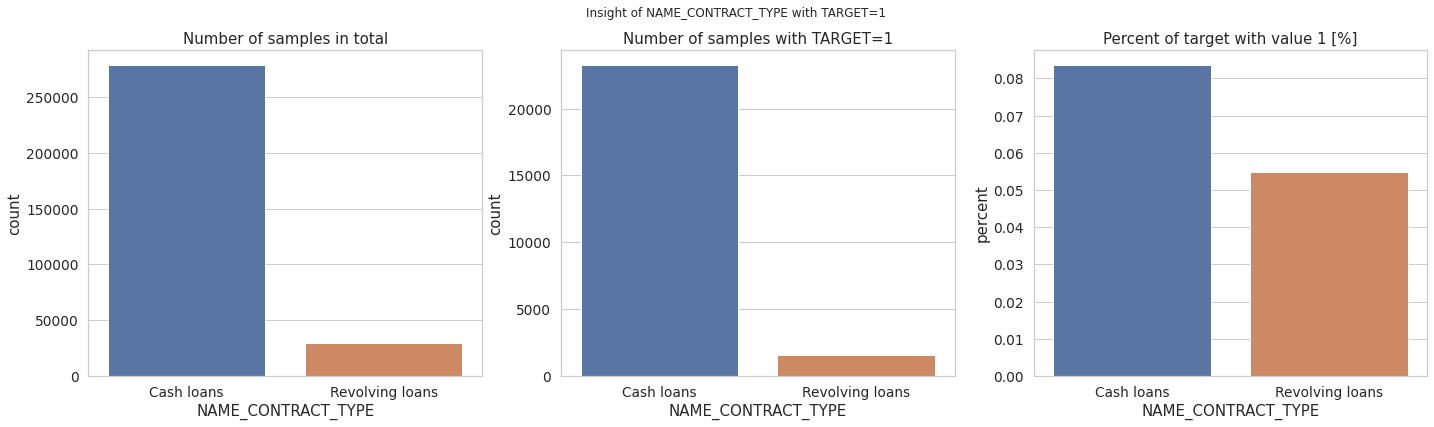

In [48]:
column_with_target_stats(data, 'NAME_CONTRACT_TYPE', target=1)

Cash loans contracts mostly occur in un-repayment events. However, **Revolving loans** still has a medium level of not repaying chance (4.5%) in comparison with **Cash loans** (8.5%)

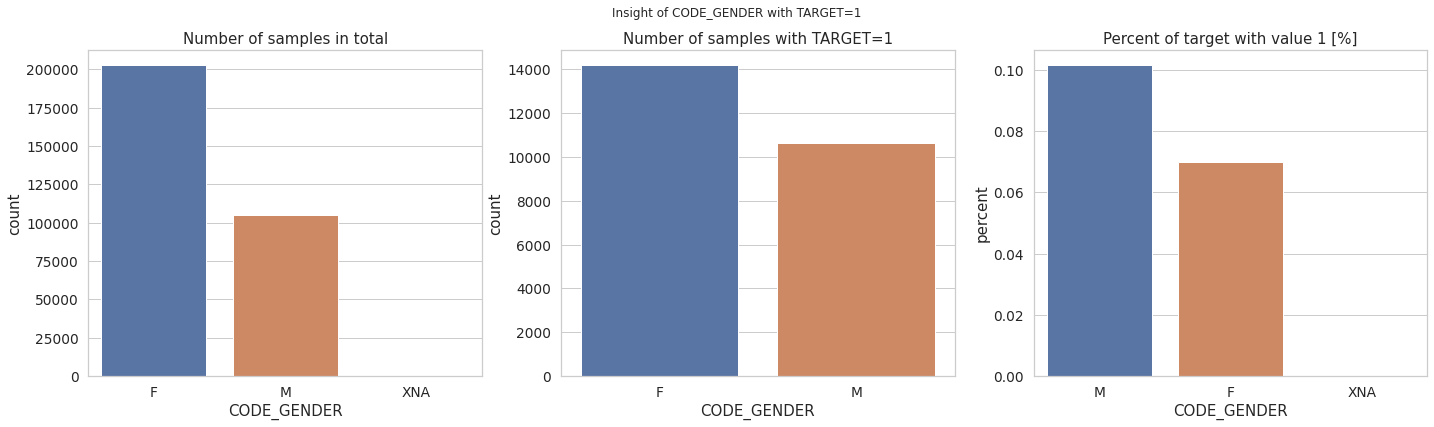

In [49]:
column_with_target_stats(data, 'CODE_GENDER')

The number of female clients is greater than male one. But males have a higher chance of not returning loans (10%) than females (7%) -> **CODE_GENDER** may affect **TARGET**

Examine other columns:

In [50]:
low_cardinality_cols = list((filter(lambda col: data[col].nunique() <= 10, data.columns)))
print("Low cardinality columns")
print(low_cardinality_cols)

Low cardinality columns
['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', '

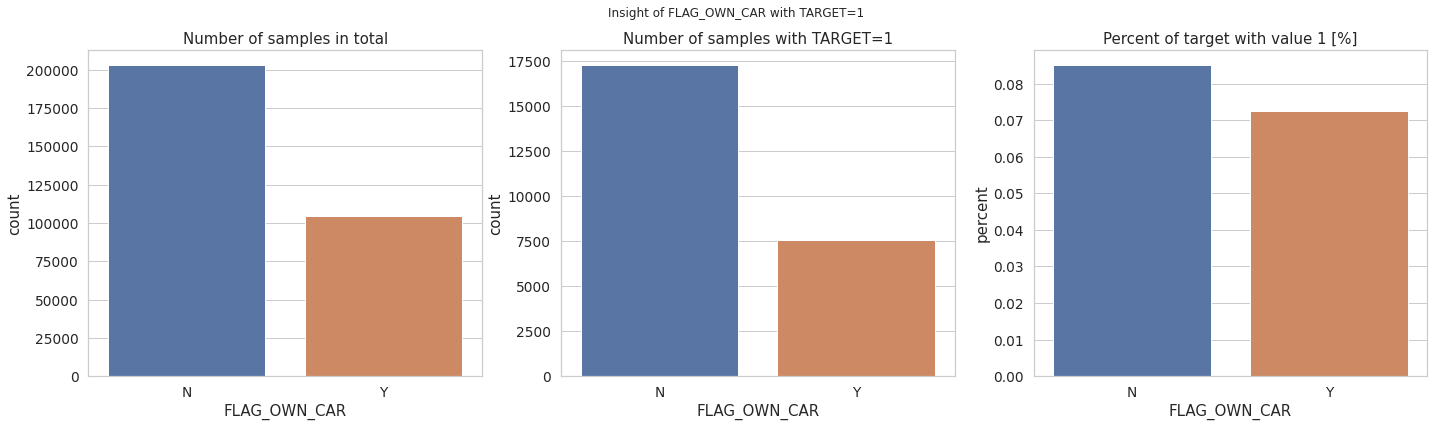

In [51]:
column_with_target_stats(data, 'FLAG_OWN_CAR')

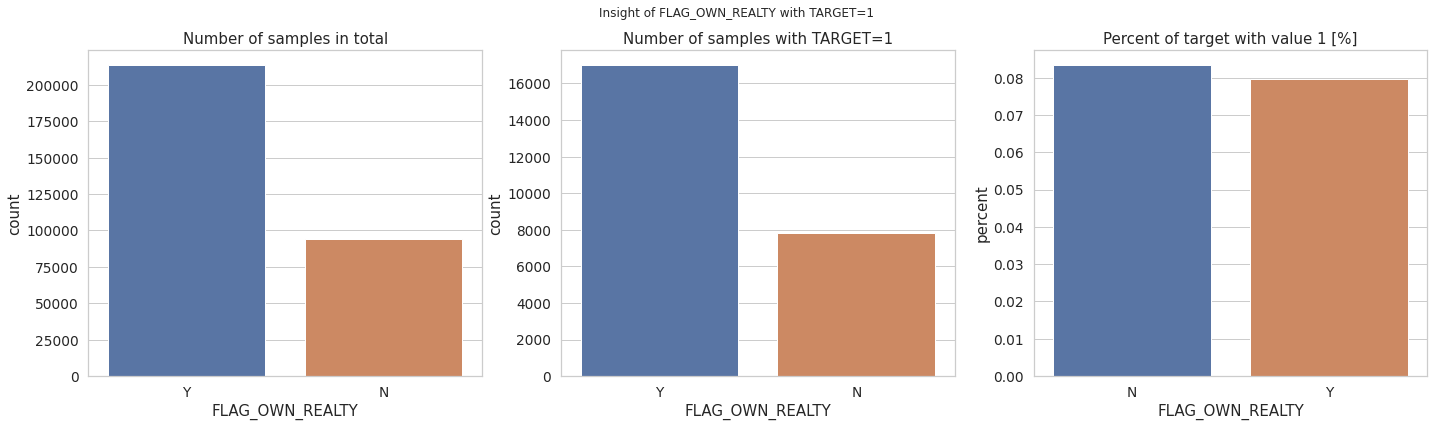

In [52]:
column_with_target_stats(data, 'FLAG_OWN_REALTY')

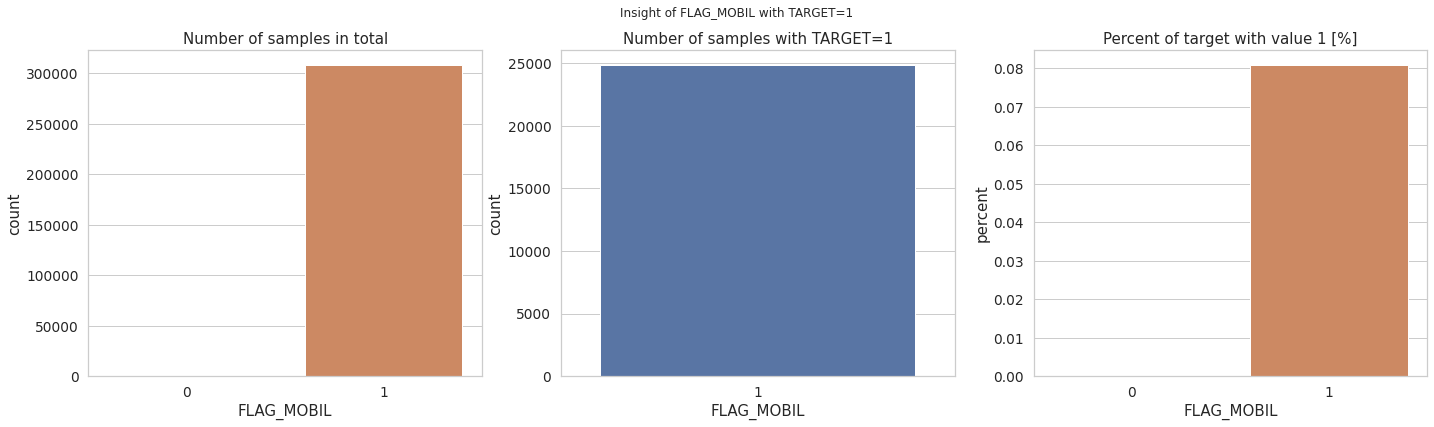

In [53]:
column_with_target_stats(data, 'FLAG_MOBIL')

All clients provide phone number...

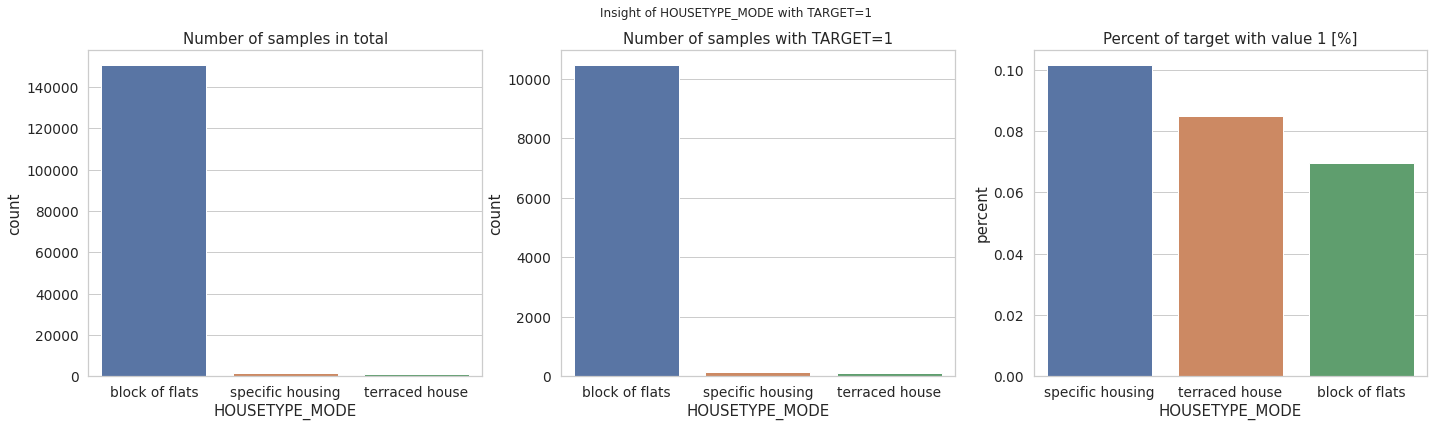

In [54]:
column_with_target_stats(data, 'HOUSETYPE_MODE')

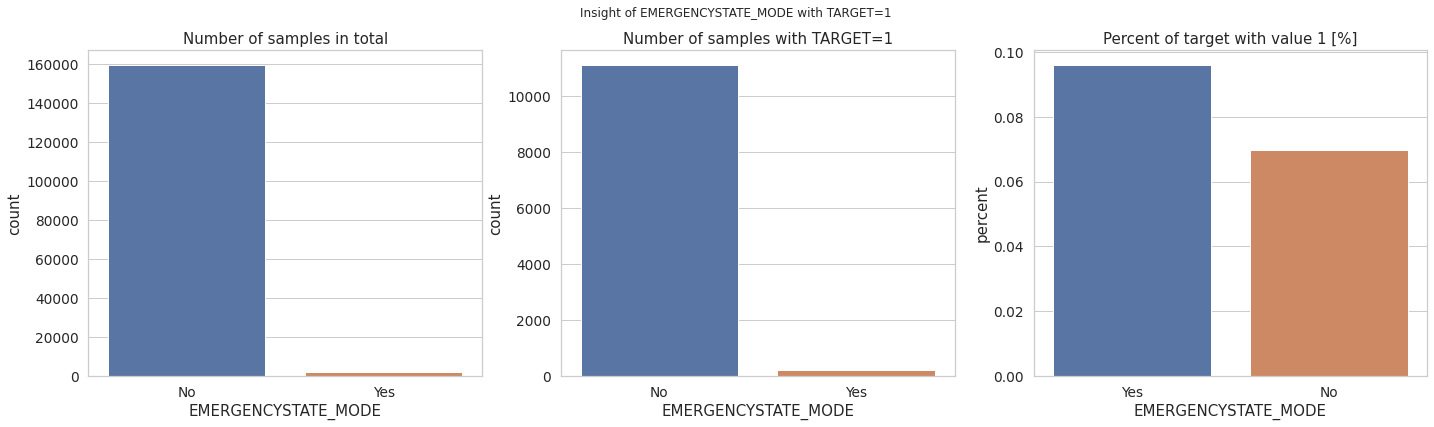

In [55]:
column_with_target_stats(data, 'EMERGENCYSTATE_MODE')

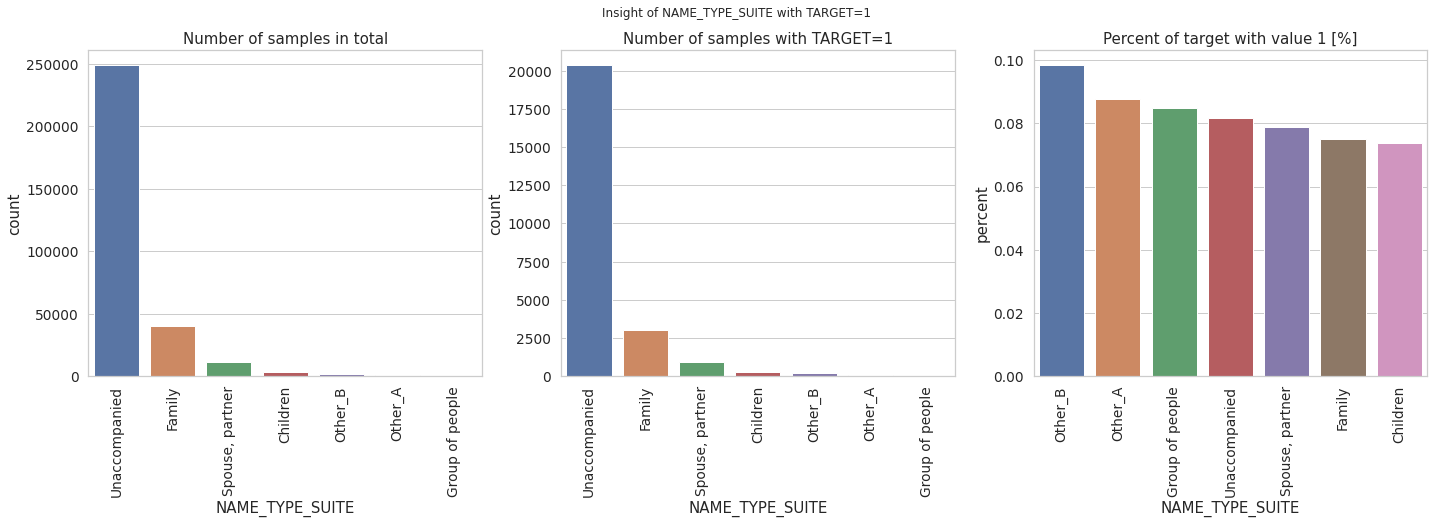

In [56]:
column_with_target_stats(data, 'NAME_TYPE_SUITE', True)

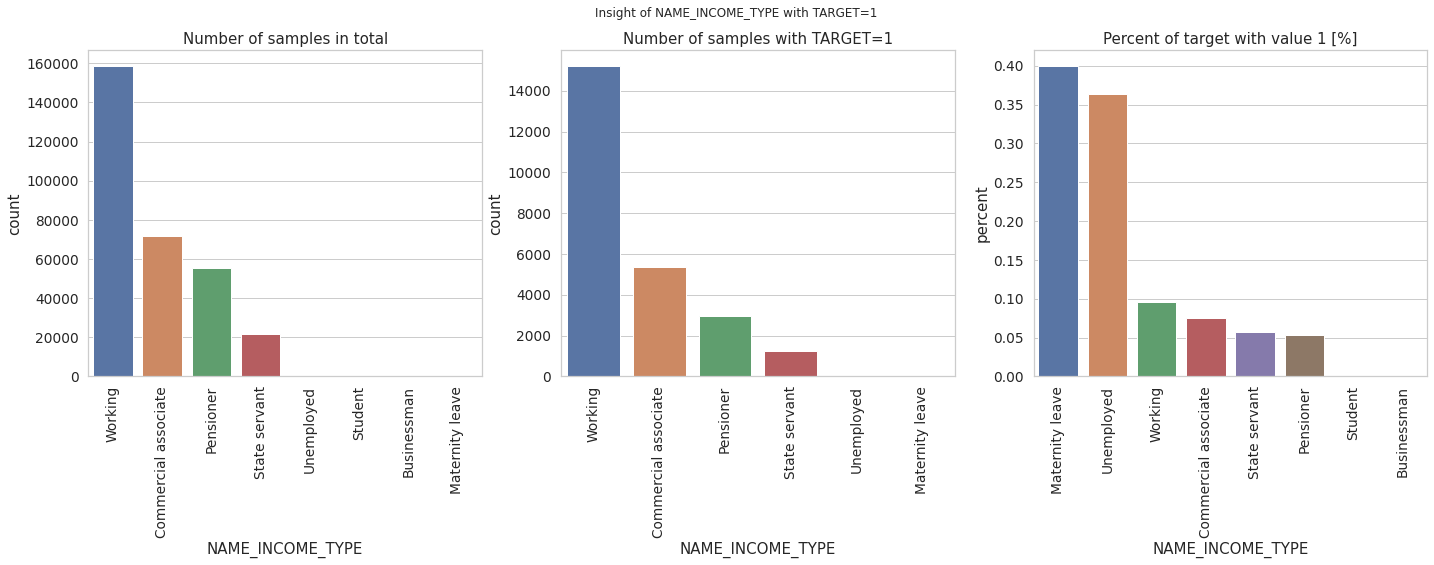

In [57]:
column_with_target_stats(data, 'NAME_INCOME_TYPE', True)

Mostly contracts made for employed clients, but 10% of them didn't repay their loans. However, the unemployed and maternity-leave population consist of small amount of samples but over 35% and 40% didn't repay, respectively. Seem reasonable...

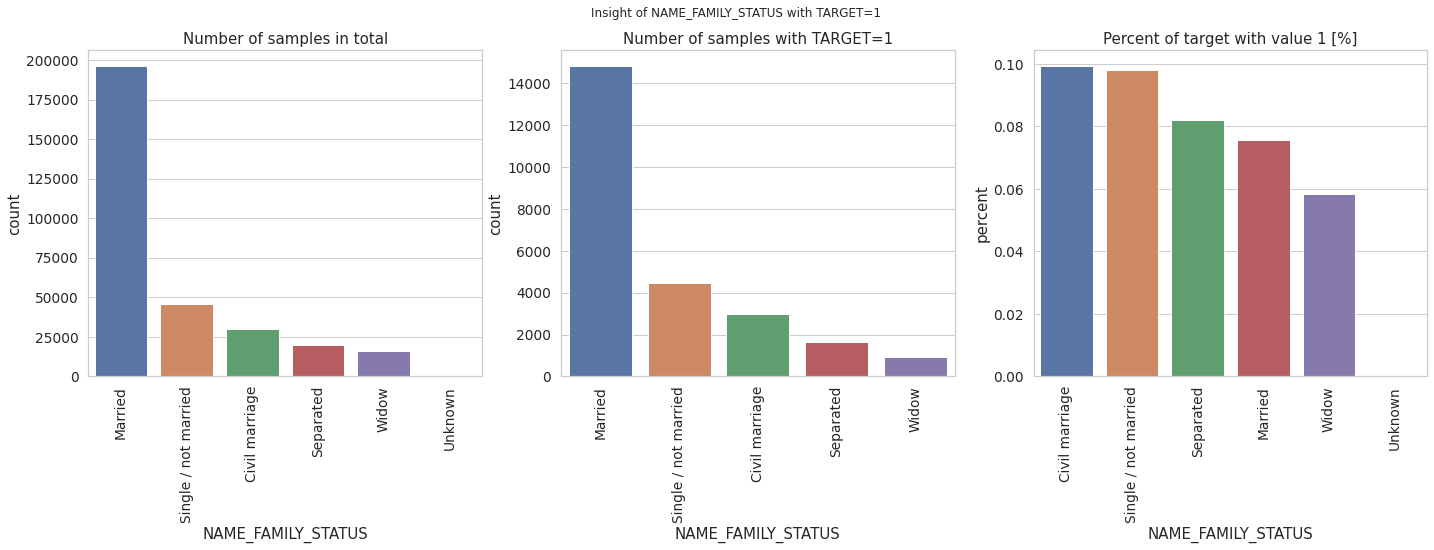

In [58]:
column_with_target_stats(data, 'NAME_FAMILY_STATUS', True)

The percentage of not repayment among family-group is about 8% in average. **Single/not married** gains the most percentage amount (10%), which is also reasonable somehow... **Civil marriage** is little higher.

In [59]:
# Drop missing value
missing_data = missing_overview(data)
drop_df = data.drop(columns=missing_data[missing_data['total'] > 5].index)
print("Remain:", drop_df.columns.values)

Remain: ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS'
 'NAME_HOUSING_TYPE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'DAYS_LAST_PHONE_CHANGE'
 'FLAG_DOCUMENT_2' 'FLAG_DOCUMENT_3' 'FLAG_DOCUMENT_4' 'FLAG_DOCUMENT_5'
 'FLAG_DOCUMENT_6' 'FLAG_DOCUMENT_7' 'FLAG_DOCUMENT_8' 'FLAG_DOCUMENT_9'
 'FLAG_DOCUMENT_10' 'FLAG_DOCUMENT_11' 'FLAG_DOCUMENT_12'
 'FLAG_DOCUMENT_13' 'FLAG_DOCUMEN

Consider other chance of correlationship

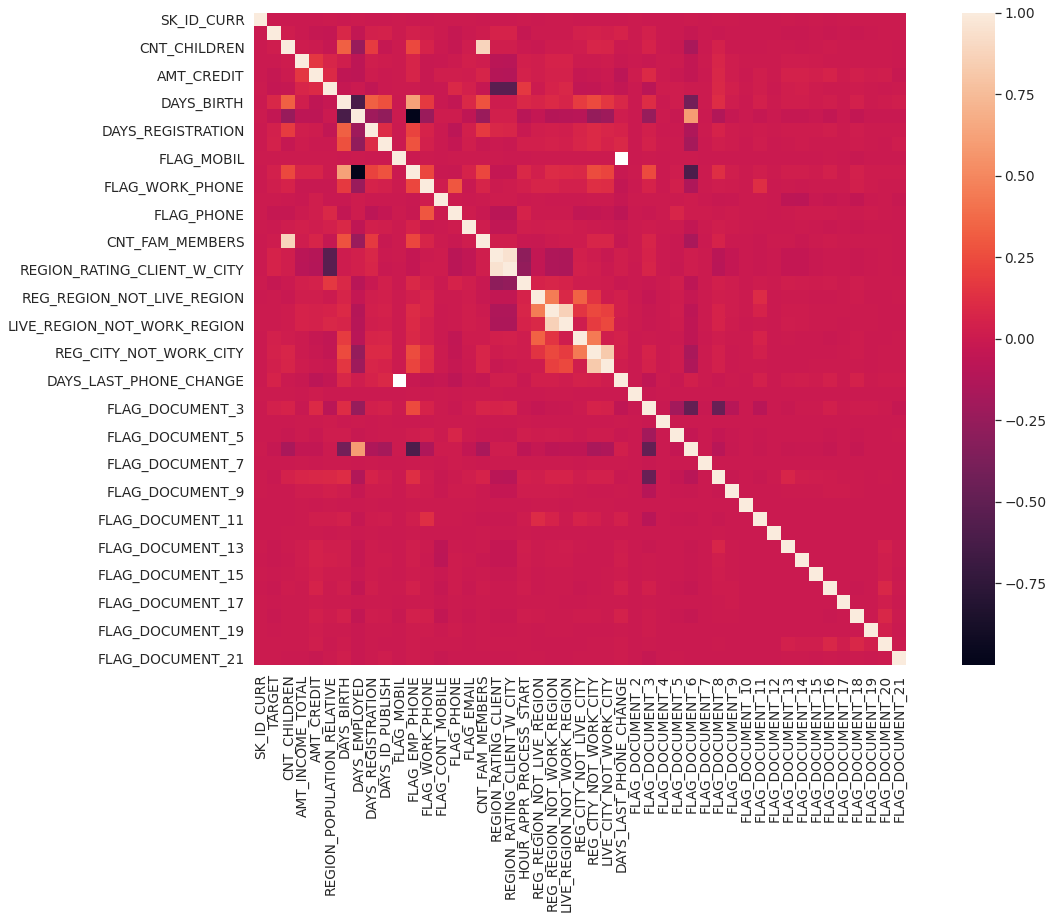

In [60]:
corrmat = drop_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corrmat, square=True)
plt.show()

According to heatmap, some positive correlating group of features:

*   CNT_CHILDREN & CNT_FAM_MEMBERS & REGION_RATING_CLIENT
*   FLAG_MOBIL & DAYS_LAST_PHONE_CHANGE, etc.

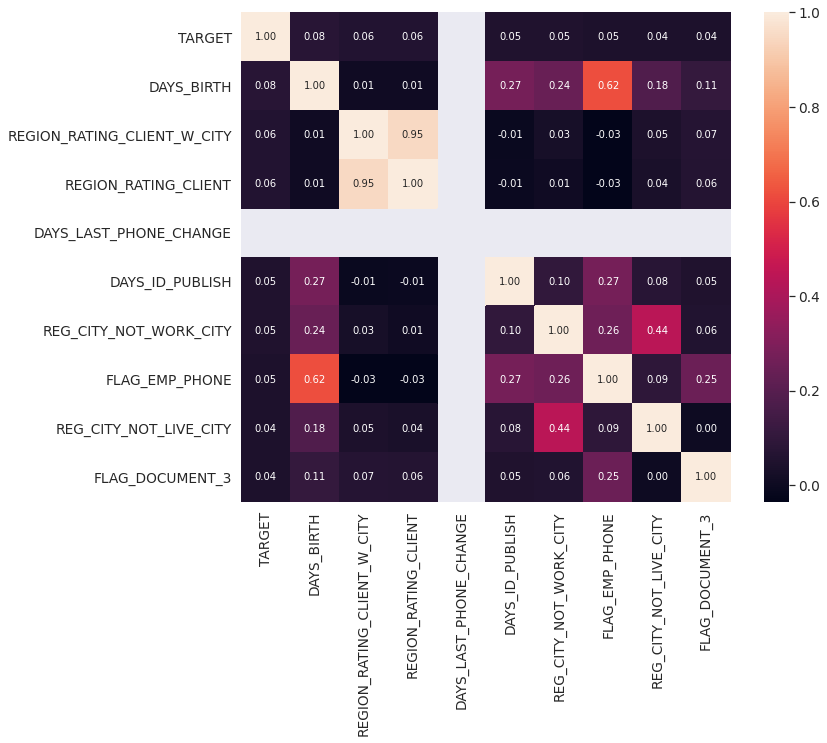

In [61]:
# 10 features/cols have the highest correlation coefficient values with target
cols = corrmat.nlargest(10, 'TARGET').index
top10_corrmat = np.corrcoef(drop_df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 9))
sns.heatmap(top10_corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Explore distribution of real-value column features

In [62]:
# Plot distribution of one feature
def plot_distribution(data, column, color='r'):
    plt.figure(figsize=(10,6))
    plt.title(f"Distribution of {column}")
    sns.histplot(data[column].dropna(), color=color, kde=True, bins=100)
    plt.show()

# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(data, columns, nrow=2):
    t1 = data.loc[data['TARGET'] != 0]
    t0 = data.loc[data['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize=(12,6*nrow))

    i = 0
    for col in columns:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[col], bw_adjust=0.1, label="TARGET = 1")
        sns.kdeplot(t0[col], bw_adjust=0.1, label="TARGET = 0")
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Density plot', fontsize=12)
        plt.legend()
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

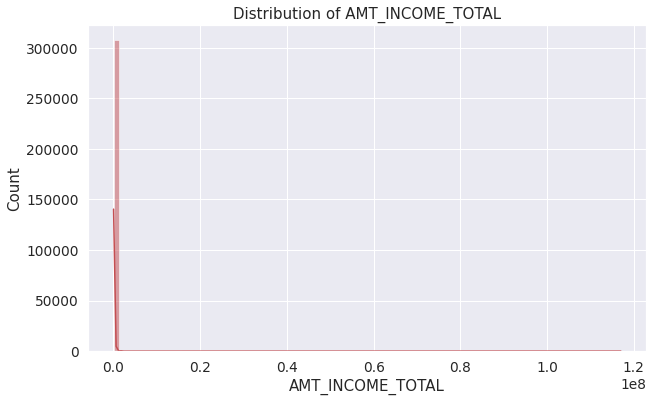

In [63]:
plot_distribution(data, 'AMT_INCOME_TOTAL')

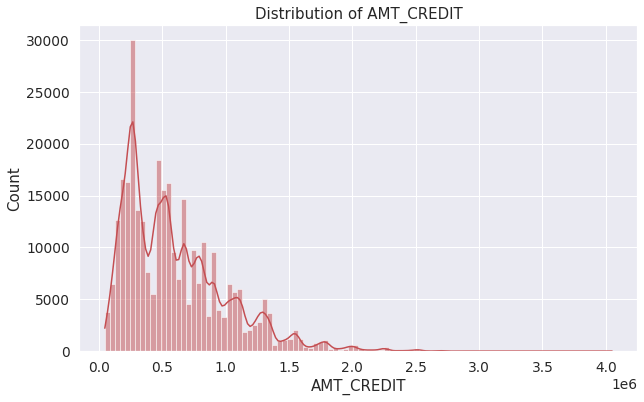

In [64]:
plot_distribution(data, 'AMT_CREDIT')

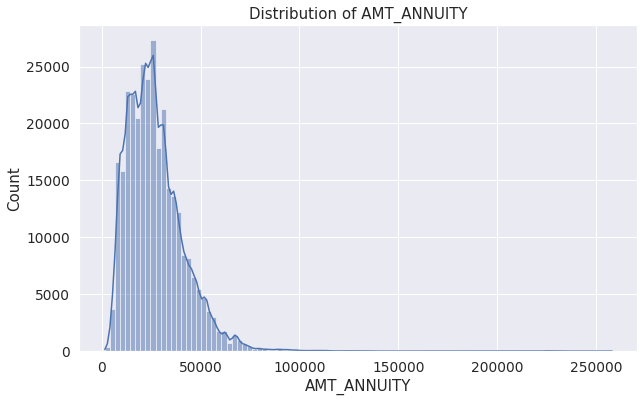

In [65]:
plot_distribution(data, 'AMT_ANNUITY', 'b')

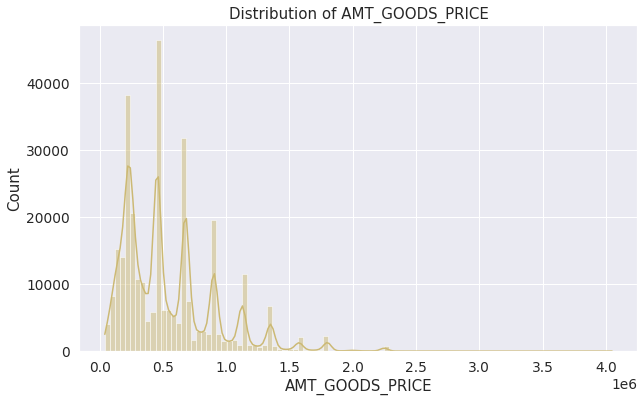

In [66]:
plot_distribution(data, 'AMT_GOODS_PRICE', 'y')

The data not follows normal distribution

<Figure size 432x288 with 0 Axes>

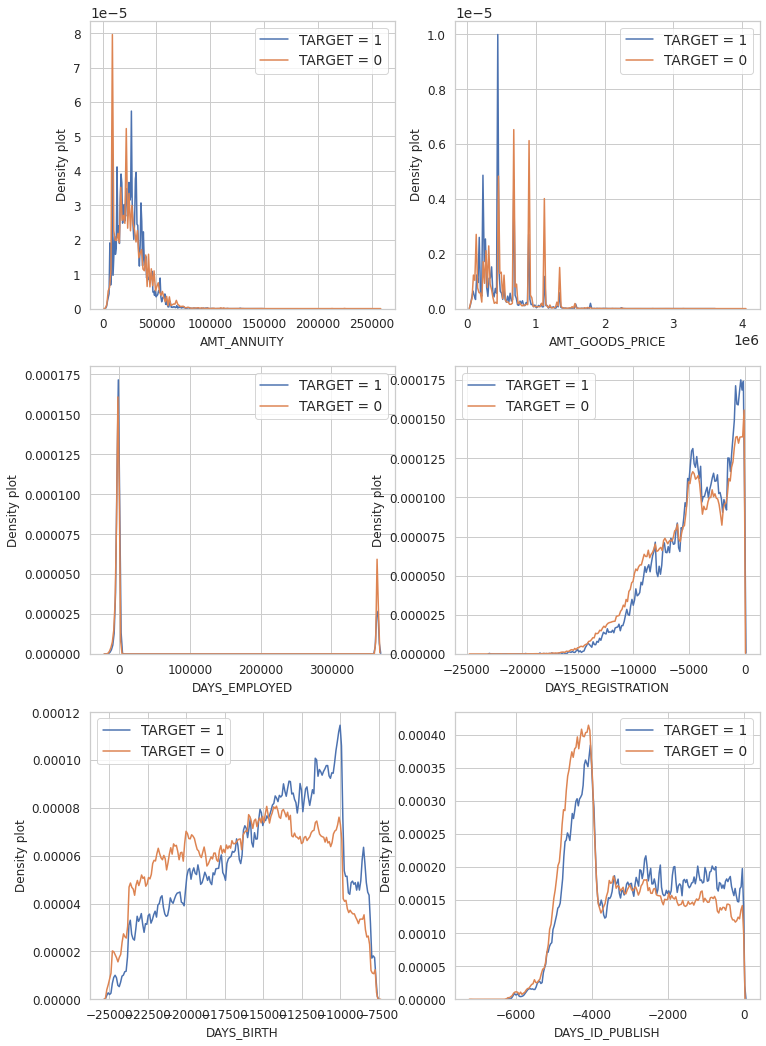

In [67]:
cols = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(data, cols, 3)

It's seem that the distributions of interval values from features remain between 2 sets of samples (TARGET=1 and TARGET=0) no matter of imbalancing shown previously.